# Assignment 3

In [2]:
# Import libraries
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

## Task 1: MLE computation

As you know, we can think about linear regression from the optimization point of view (as the problem of minimizing the root mean squared error), but we can also consider it from the probabilistic point of view.
Let's consider the following equation:

\begin{equation*}
y_i=x_i B_0+\varepsilon_i
\end{equation*}

where $y_i$ is the dependent variable, $x_i$ is a $1 \times K$ vector of regressors, $\beta_0$ is the $K \times 1$ vector of regression coefficients to be estimated and $\varepsilon_i$ is an unobservable error term.

The sample is made up of $N$ IID observations $\left(y_i, x_i\right)$.
The regression equations can be also written as

\begin{equation*}
y=X \beta_0+\varepsilon
\end{equation*}

where the $N \times 1$ vector of observations of the dependent variable is denoted by $y$, the $N \times K$ matrix of regressors is denoted by $X$, and the $N \times 1$ vector of error terms is denoted by $\varepsilon$.

As everybody interested in probability theory knows, we always have to have some assumptions. In this case, we assume that the vector of errors $\varepsilon$ has a multivariate normal distribution conditional on $x$, with mean equal to 0 and covariance matrix equal to

\begin{equation*}
\sigma_0^2 I
\end{equation*}

where $l$ is the $N \times N$ identity matrix and

\begin{equation*}
\sigma_0^2=\operatorname{Var}\left[\varepsilon_i \mid X\right]
\end{equation*}

is the second parameter to be estimated.
Furthermore, it is assumed that the matrix of regressors $x$ has full-rank.

Those assumptions have interesting implications:
- the covariance matrix of $\varepsilon$ is diagonal implies that the entries of $\varepsilon$ are mutually independent (i.e., $\varepsilon_i$ is independent of $\varepsilon_j$ for $i \neq j$.)
- they all have a normal distribution with mean 0 and variance $\sigma_0^2$.

The fact that we transform normal random variables linearly makes the dependent variable $y_i$ conditionally normal, with mean $x_i \beta_0$ and variance $\sigma_0^2$. Therefore, its cdf is

\begin{equation*}
f_Y\left(y_i \mid X\right)=\left(2 \pi \sigma_0^2\right)^{-1 / 2} \exp \left(-\frac{1}{2} \frac{\left(y_i-x_i \beta_0\right)^2}{\sigma_0^2}\right)
\end{equation*}

Having this probability model we can use it to do estimation of regression parameters using Maximum Likelihood Estimation method.

The first-order conditions for a maximum are

\begin{equation*}
\begin{aligned}
& \nabla_\beta l\left(\beta, \sigma^2 ; y, X\right)=0 \\
& \frac{\partial}{\partial \sigma^2} l\left(\beta, \sigma^2 ; y, X\right)=0
\end{aligned}
\end{equation*}

where $\nabla_\beta$ indicates the gradient calculated with respect to $\beta$, that is, the vector of the partial derivatives of the log-likelihood with respect to the entries of $\beta$. The gradient is

\begin{equation*}
\begin{aligned}
& \nabla_\beta l\left(\beta, \sigma^2: y, X\right) \\
= & \nabla_\beta\left(-\frac{N}{2} \ln (2 \pi)-\frac{N}{2} \ln \left(\sigma^2\right)-\frac{1}{2 \sigma^2} \sum_{i=1}^N\left(y_i-x_i \beta\right)^2\right) \\
= & \frac{1}{\sigma^2} \sum_{i=1}^N x_i^{\top}\left(y_i-x_i \beta\right) \\
= & \frac{1}{\sigma^2}\left(\sum_{i=1}^N x_i^{\top} y_i-\sum_{i=1}^N x_i^{\top} x_i \beta\right)
\end{aligned}
\end{equation*}

which is equal to zero only if

\begin{equation*}
\sum_{i=1}^N x_i^{\top} y_i-\sum_{i=1}^N x_i^{\top} x_i \beta=0
\end{equation*}


Therefore, the first of the two equations is satisfied if

\begin{equation*}
\beta=\left(\sum_{i=1}^N x_i^{\top} x_i\right)^{-1} \sum_{i=1}^N x_i^{\top} y_i=\left(X^{\top} X\right)^{-1} X^{\top} y
\end{equation*}

where we have used the assumption that $x$ has full rank and, as a consequence, $x^x x$ is invertible.


### Subtask A:
Prove that the MLE for variance is equal to
$$
\widehat{\sigma}_n^2=\frac{1}{N} \sum_{i=1}^N\left(y_i-x_i \widehat{\beta}_N\right)^2
$$

### MLE for Logistic regression

In the logistic regression model, the output variable $y_i$ is a Bernoulli random variable (it can take only two values, either 1 or 0 ) and

\begin{equation*}
\mathrm{P}\left(y_i=1 \mid x_i\right)=S\left(x_i \beta\right)
\end{equation*}

where

\begin{equation*}
S(t)=\frac{1}{1+\exp (-t)}
\end{equation*}

is the logistic function, $x_i$ is a $1 \times K$ vector of inputs and $\beta$ is a $K \times 1$ vector of coefficients.

Furthermore,

\begin{equation*}
\mathrm{P}\left(y_i=0 \mid x_i\right)=1-S\left(x_i \beta\right)
\end{equation*}


The vector of coefficients $\beta$ is the parameter to be estimated by maximum likelihood.
We assume that the estimation is carried out with an IID sample comprising $N$ data points

\begin{equation*}
\left(y_i, x_i\right) \text { for } i=1, \ldots, N
\end{equation*}

### Subtask B
1. Find the form of the loglikelihood.
2. Compute the gradient of logistic function with respect to $\beta$

You can either tex your solution and put it in this notebook or attach photos of your solution.

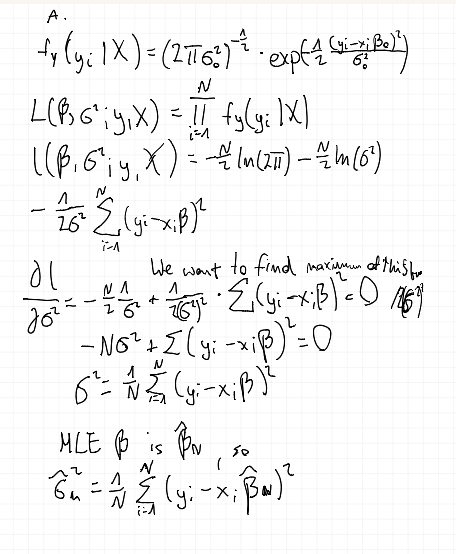 <br>
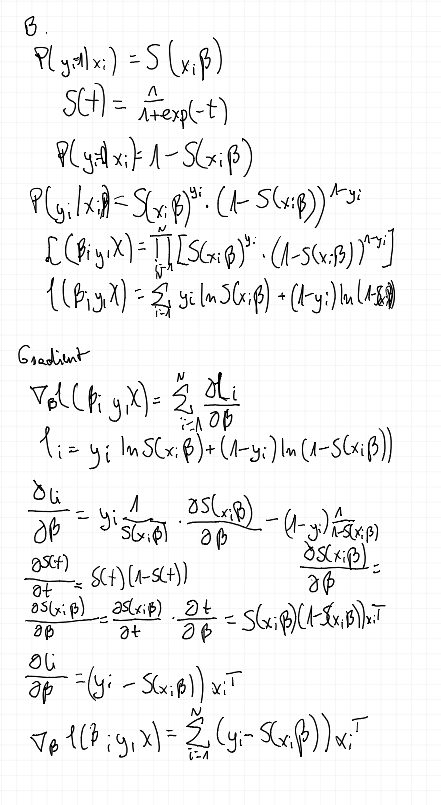

## Task 2: Implement Logistic Regression

Use derivations form previous task to perform logistic regression. Provide a custom implemntation of gradient descent for this taks.
**Bonus points** provide also implementation of other optimization algorithm of your choice, eg. Newton-Rhapson method.


In [3]:
import numpy as np

In [4]:
def sigmoid(x):
  return 1 / (1 + np.exp(-x))

def log_likelihood(X, y, beta):
  predictions = sigmoid(np.dot(X, beta))
  return np.sum(y*np.log(predictions) + (1-y)*np.log(1-predictions))

def gradient_descent(X, y, lr=0.01, iterations=1000):
  N, K = X.shape
  beta = np.zeros(K)
  for i in range(iterations):
    predictions = sigmoid(np.dot(X, beta))
    gradient = np.dot(X.T, y - predictions) / N
    beta += lr * gradient
  return beta    

In [5]:
# Test
np.random.seed(42)
N = 100
X = np.random.rand(N, 2)  # Two features
X = np.c_[np.ones(N), X]  # Add intercept term
true_beta = np.array([-1, 2, 3])  # True coefficients
y = (sigmoid(np.dot(X, true_beta)) > 0.5).astype(int)  # Generate labels

print("Gradient Descent:")
beta_gd = gradient_descent(X, y, lr=0.1, iterations=1000)
print("Estimated coefficients (Gradient Descent):", beta_gd)

Gradient Descent:
Estimated coefficients (Gradient Descent): [0.34965845 2.09263739 2.69448857]


## Task 3: Classification for Imbalanced Data

Split the data using a technique suitable for imbalanced classes. Describe its working.

Train a logistic regression model on the below data.

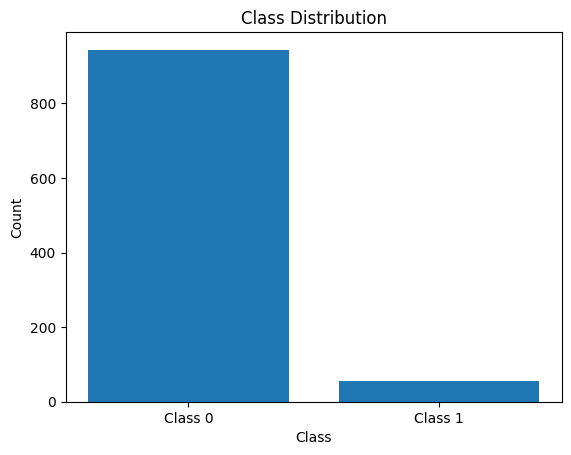

Dataset Shape: (1000, 20)
Class Distribution: [944  56]


In [6]:
from sklearn.datasets import make_classification


# Create a synthetic dataset
X, y = make_classification(
    n_samples=1000,
    n_informative=4, n_redundant=5, n_features=20, n_clusters_per_class=3,
    n_classes=2,
    weights=[0.95, 0.05],
    random_state=42
)

# Visualize class distribution
def visualize_class_distribution(y):
    plt.bar(['Class 0', 'Class 1'], [sum(y == 0), sum(y == 1)])
    plt.title("Class Distribution")
    plt.xlabel("Class")
    plt.ylabel("Count")
    plt.show()

visualize_class_distribution(y)

# Summarize dataset
print("Dataset Shape:", X.shape)
print("Class Distribution:", np.bincount(y))


Evaluate your binary classifiers using the following:
- confusion matrix,
- accuracy,
- precision,
- recall,
- F1 score,
- ROCAUC.

Please write custom functions calculating the above functions and plotting the receiver operating characteristic curve. Describe your intuition behind each metric and its suitability for imbalanced classes.



Propose, describe and implement a technique for improving the model's ability to distinguish the classes. Evaluate your approach.

In [7]:
# imports
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc


In [8]:
# Stratified train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

In [9]:
# Train logistic regression model
model = LogisticRegression(random_state=42, max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [10]:
# Make predictions
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

In [11]:
# Custom metric functions
def calculate_confusion_matrix(y_true, y_pred):
  TP = np.sum((y_true == 1) & (y_pred == 1))
  TN = np.sum((y_true == 0) & (y_pred == 0))
  FP = np.sum((y_true == 0) & (y_pred == 1))
  FN = np.sum((y_true == 1) & (y_pred == 0))
  return TP, TN, FP, FN

def calculate_metrics(y_true, y_pred):
  TP, TN, FP, FN = calculate_confusion_matrix(y_true, y_pred)
  accuracy = (TP + TN) / (TP + TN + FP + FN)
  precision = TP / (TP + FP) if (TP + FP) > 0 else 0
  recall = TP / (TP + FN) if (TP + FN) > 0 else 0
  f1_score = 2 * precision * recall / (precision + recall) if (precision + recall) > 0 else 0
  return accuracy, precision, recall, f1_score

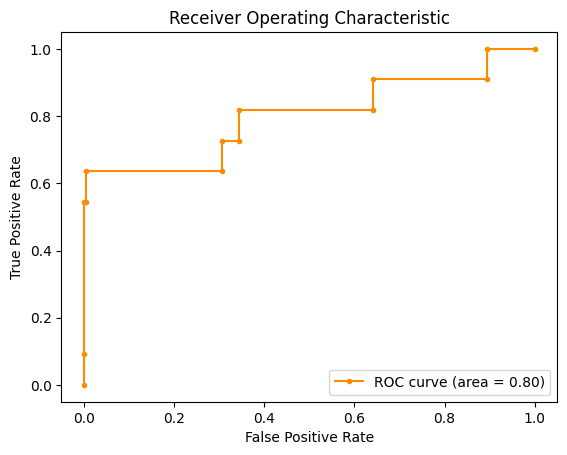

Confusion Matrix:
TP: 5, TN: 189, FP: 0, FN: 6
Accuracy: 0.97
Precision: 1.00
Recall: 0.45
F1 Score: 0.62
ROC AUC: 0.80


In [12]:
def plot_roc_curve(y_true, y_prob):
  fpr, tpr, _ = roc_curve(y_true, y_prob)
  roc_auc = auc(fpr, tpr)
  plt.figure()
  plt.plot(fpr, tpr, color='darkorange', marker=".", label=f'ROC curve (area = {roc_auc:.2f})')
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Receiver Operating Characteristic')
  plt.legend(loc="lower right")
  plt.show()
  return roc_auc

# Evaluate model
accuracy, precision, recall, f1_score = calculate_metrics(y_test, y_pred)
roc_auc = plot_roc_curve(y_test, y_prob)

# Print results
print("Confusion Matrix:")
TP, TN, FP, FN = calculate_confusion_matrix(y_test, y_pred)
print(f"TP: {TP}, TN: {TN}, FP: {FP}, FN: {FN}")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1_score:.2f}")
print(f"ROC AUC: {roc_auc:.2f}")


## Task 4: Optimization of Neural Networks

The **backpropagation algorithm** is the foundational algorithm in deep learning. In this task You will have to go through a single iteration of said algorithm and compare the results after updating networks weights. <br>
You are given a neural network with one input layer consisting of two input nodes ${n_1, n_2}$, one hidden layer with two neurons ${n_3, n_4}$ and an output layer with a single node $n_5$. We will denote the weight connecting $n_i$ to $n_j$ as $w_{i,j}$. A bias related to $n_i$ will be denoted as $b_i$. Parameters are initialized as follows:
* $w_{1,3} = 1.5$ ; $w_{2,3} = -2.5$ ; $b_{3} = 0.3$
* $w_{1,4} = 1$ ; $w_{2,4} = -2.5$ ; $b_{4} = 0.2$
* $w_{3,5} = 4$ ; $w_{4,5} = 3$ ; $b_{5} = -0.8$ <br>

Additionally, neurons $n_3$ and $n_4$ are equipped with the sigmoid activation function: $\sigma(x) = \frac{1}{1+e^{-x}} $<br>
Your task is to use two training examples: $x = \{ (1,2), (2,0)\}$, $y = \{-1, 6\}$ to preform a single backpropagation step - preform forward calculations and propagate the received error backwards, updating the weights. After all weights have been updated, check how the predictions change, preforming additional forward pass.

### Hidden layer pre-activations
$$z_3 = w_{1, 3}*x_1 + w_{2, 3}*x_2 + b_3 = -3.2$$
$$z_4 = w_{1, 4}*x_1 + w_{2, 4}*x_2 + b_4 = -3.8$$
### Hidden layer activations
$$a_3 = \sigma(z_3) = \frac{1}{1+e^{z_3}}$$
$$a_4 = \sigma(z_4) = \frac{1}{1+e^{z_4}}$$
### Output layer pre-activation
$$z_5 = w_{3, 5}*a_3 + w_{4, 5}*a_4 + b_5 \approx -0.603 = \hat{y}^{(1)}$$


### x = (2,0)
### Hidden layer pre-activations
$$z_3 = w_{1, 3}*x_1 + w_{2, 3}*x_2 + b_3 = 3.3$$
$$z_4 = w_{1, 4}*x_1 + w_{2, 4}*x_2 + b_4 = 2.2$$
### Hidden layer activations
$$a_3 = \sigma(z_3) = \frac{1}{1+e^{-z_3}}$$
$$a_4 = \sigma(z_4) = \frac{1}{1+e^{-z_4}}$$
### Output layer pre-activation
$$z_5 = w_{3, 5}*a_3 + w_{4, 5}*a_4 + b_5 \approx 6.363 = \hat{y}^{(2)}$$


### Backward pass
$$ L = \frac{1}{2}(\hat{y} - y)^2$$
$$\delta_5^{(1)} = \frac{\partial{L}}{\partial{z_5}} = 0.397$$
$$\delta_5^{(2)} = \frac{\partial{L}}{\partial{z_5}} = 0.363$$

$$\delta_3^{(1)} = \delta_5^{(1)} * w_{3, 5} * a_3 * (1-a_3)$$
$$\delta_4^{(1)} = \delta_5^{(1)} * w_{4, 5} * a_4 * (1-a_4)$$

Same for $\delta^{(2)}$
$$w_{i, j} \leftarrow w_{i, j} - η * \frac{\partial{L}}{\partial{w_{i,j}}}$$
$$b_j \leftarrow b_j - η * \delta _j$$


In [13]:
import numpy as np

# Sigmoid function and its derivative
def sigmoid(x):
  return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
  return sigmoid(x) * (1 - sigmoid(x))

# Learning rate
eta = 0.1

# Initial weights and biases
weights = {
  "w13": 1.5, "w23": -2.5, "b3": 0.3,
  "w14": 1, "w24": -2.5, "b4": 0.2,
  "w35": 4, "w45": 3, "b5": -0.8
}

# Training data
x_data = np.array([[1, 2], [2, 0]])  # Inputs
y_data = np.array([-1, 6])  # Targets

# Forward pass
def forward(x, weights):
    # Hidden layer pre-activations
  z3 = weights["w13"] * x[0] + weights["w23"] * x[1] + weights["b3"]
  z4 = weights["w14"] * x[0] + weights["w24"] * x[1] + weights["b4"]
  a3 = sigmoid(z3)
  a4 = sigmoid(z4)
  
  # Output layer pre-activation
  z5 = weights["w35"] * a3 + weights["w45"] * a4 + weights["b5"]
  y_hat = z5  # Output is linear activation at final node
  
  return z3, z4, a3, a4, z5, y_hat

# Backward pass and weight updates
for i in range(len(x_data)):
  x = x_data[i]
  y = y_data[i]
  
  # Forward pass
  z3, z4, a3, a4, z5, y_hat = forward(x, weights)
  
  # Output error
  delta5 = (y_hat - y)
  
  # Hidden layer error
  delta3 = delta5 * weights["w35"] * sigmoid_derivative(z3)
  delta4 = delta5 * weights["w45"] * sigmoid_derivative(z4)
  
  # Gradients and weight updates
  weights["w35"] -= eta * delta5 * a3
  weights["w45"] -= eta * delta5 * a4
  weights["b5"] -= eta * delta5
  
  weights["w13"] -= eta * delta3 * x[0]
  weights["w23"] -= eta * delta3 * x[1]
  weights["b3"] -= eta * delta3
  
  weights["w14"] -= eta * delta4 * x[0]
  weights["w24"] -= eta * delta4 * x[1]
  weights["b4"] -= eta * delta4

# Perform updated forward pass
updated_predictions = []
for x in x_data:
  _, _, _, _, _, y_hat = forward(x, weights)
  updated_predictions.append(y_hat)

weights, updated_predictions


({'w13': 1.5017696826342153,
  'w23': -2.5127137186501787,
  'b3': 0.2977064116545629,
  'w14': 1.013066771802244,
  'w24': -2.5054230467043723,
  'b4': 0.2051776242250289,
  'w35': 4.02639466506378,
  'w45': 3.0252546633765536,
  'b5': -0.8131275689084478},
 [-0.5926392426455447, 5.802099766945859])

## Task 5: L1 & L2 Regularization for Logistic Regression

In this task we will use a synthetic dataset generated by the function `make_classification`.

1. Use a pairplot to see the relationships between the features in the dataset.
2. Apply your logistic regression model from Task 1 on this dataset and measure its accuracy.
3. Modify your implementation to account for two regularization methods: L1 and L2 and apply them to the dataset. What can you observe?
4. Which features are selected by L1 regularization? Plot the decision boundary for these features.

(If you have not done Task 1, use `LogisticRegression` from `sklearn` to see the effects of regularization. You can get half of the points for this task if you do that.)

In [14]:

X, y = make_classification(
    n_samples=1000,
    n_features=20,
    n_informative=5,
    n_redundant=5,
    n_classes=2,
    random_state=42
)

dataset = pd.DataFrame(X, columns=[f"Feature_{i}" for i in range(1, 21)])
dataset['Target'] = y

In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


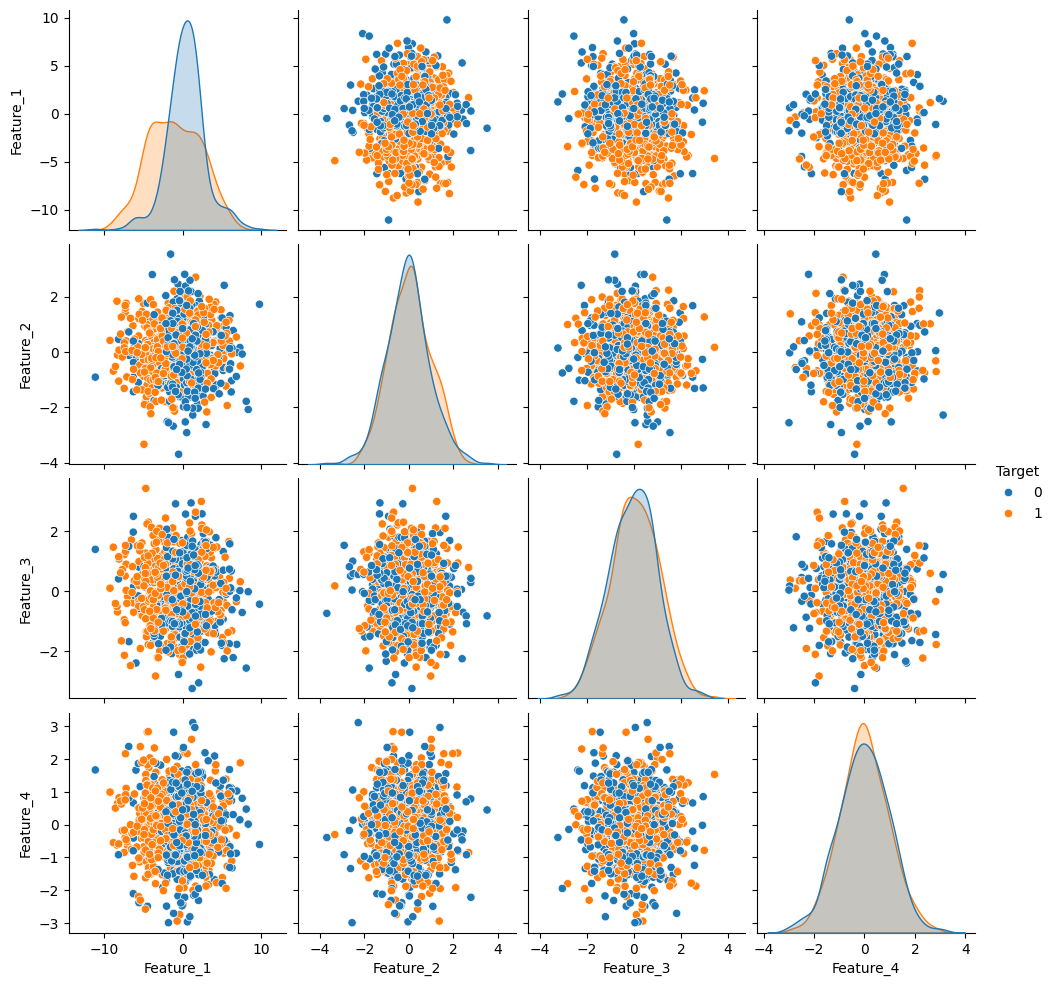

In [16]:
sns.pairplot(dataset, vars=["Feature_1", "Feature_2", "Feature_3", "Feature_4"], hue="Target", diag_kind="kde")
plt.show()

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

beta = gradient_descent(X_train, y_train, lr=0.01, iterations=1000)

# Predictions
y_pred = (sigmoid(np.dot(X_test, beta)) > 0.5).astype(int)
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.79


In [62]:
def gradient_descent_regularized(X, y, lr=0.01, iterations=1000, l1=0.0, l2=0.0):
  N, K = X.shape
  beta = np.zeros(K)

  for i in range(iterations):
    predictions = sigmoid(np.dot(X, beta))
    error = y - predictions

    # Compute the gradient
    gradient = np.dot(X.T, error) / N

    # Apply L1 and L2 regularization to the gradient
    if l1 > 0:
      gradient -= l1 * np.sign(beta)
    if l2 > 0:
      gradient -= l2 * 2 * beta

    # Update beta using the gradient
    beta += lr * gradient

  return beta

Coefficients with L1 regularization: [-2.54290255e-04  9.80438019e-04  7.42458208e-04 -9.35049747e-04
 -1.07109963e-03  1.38926118e-03  1.37016827e-04  4.06756172e-04
 -4.21572614e-04 -1.35468924e-03  4.58841946e-02 -2.51417990e-04
 -5.58608119e-04 -6.60307661e-01  6.32379955e-05  7.03418788e-04
  4.22253984e-04 -1.96546863e-04  2.19006282e-04 -5.04945667e-04]
Coefficients with L2 regularization: [-0.19946765  0.04213847  0.02839197  0.01721977 -0.0373612   0.12632223
  0.08880784  0.04587581 -0.07024056 -0.13454381  0.18305189 -0.13685851
  0.03758724 -0.37001847 -0.04536952  0.02633879 -0.0234489   0.0332013
  0.15094565  0.01043898]
Accuracy with L1 regularization: 0.7766666666666666
Accuracy with L2 regularization: 0.79


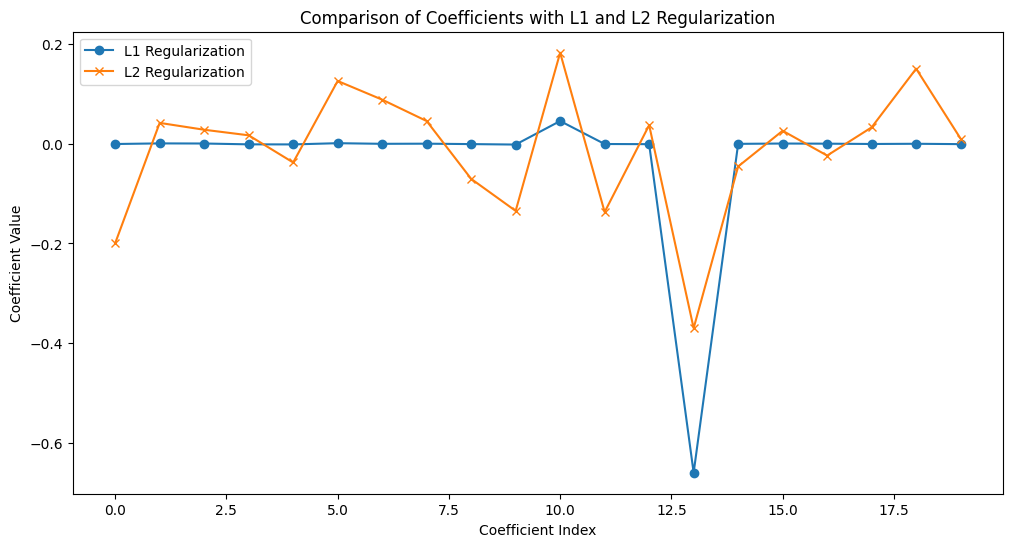

In [71]:
beta_l1 = gradient_descent_regularized(X_train, y_train, lr=0.01, iterations=1000, l1=0.1)
beta_l2 = gradient_descent_regularized(X_train, y_train, lr=0.01, iterations=1000, l2=0.1)

# Predictions
y_pred_l1 = (sigmoid(np.dot(X_test, beta_l1)) > 0.5).astype(int)
y_pred_l2 = (sigmoid(np.dot(X_test, beta_l2)) > 0.5).astype(int)

# Accuracy
accuracy_l1 = accuracy_score(y_test, y_pred_l1)
accuracy_l2 = accuracy_score(y_test, y_pred_l2)

# Compare coefficients
print("Coefficients with L1 regularization:", beta_l1)
print("Coefficients with L2 regularization:", beta_l2)

# Compare accuracy
print("Accuracy with L1 regularization:", accuracy_l1)
print("Accuracy with L2 regularization:", accuracy_l2)

# Plot the coefficients
plt.figure(figsize=(12, 6))
plt.plot(beta_l1, label='L1 Regularization', marker='o')
plt.plot(beta_l2, label='L2 Regularization', marker='x')
plt.title('Comparison of Coefficients with L1 and L2 Regularization')
plt.xlabel('Coefficient Index')
plt.ylabel('Coefficient Value')
plt.legend()
plt.show()

Selected features by L1 regularization: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]


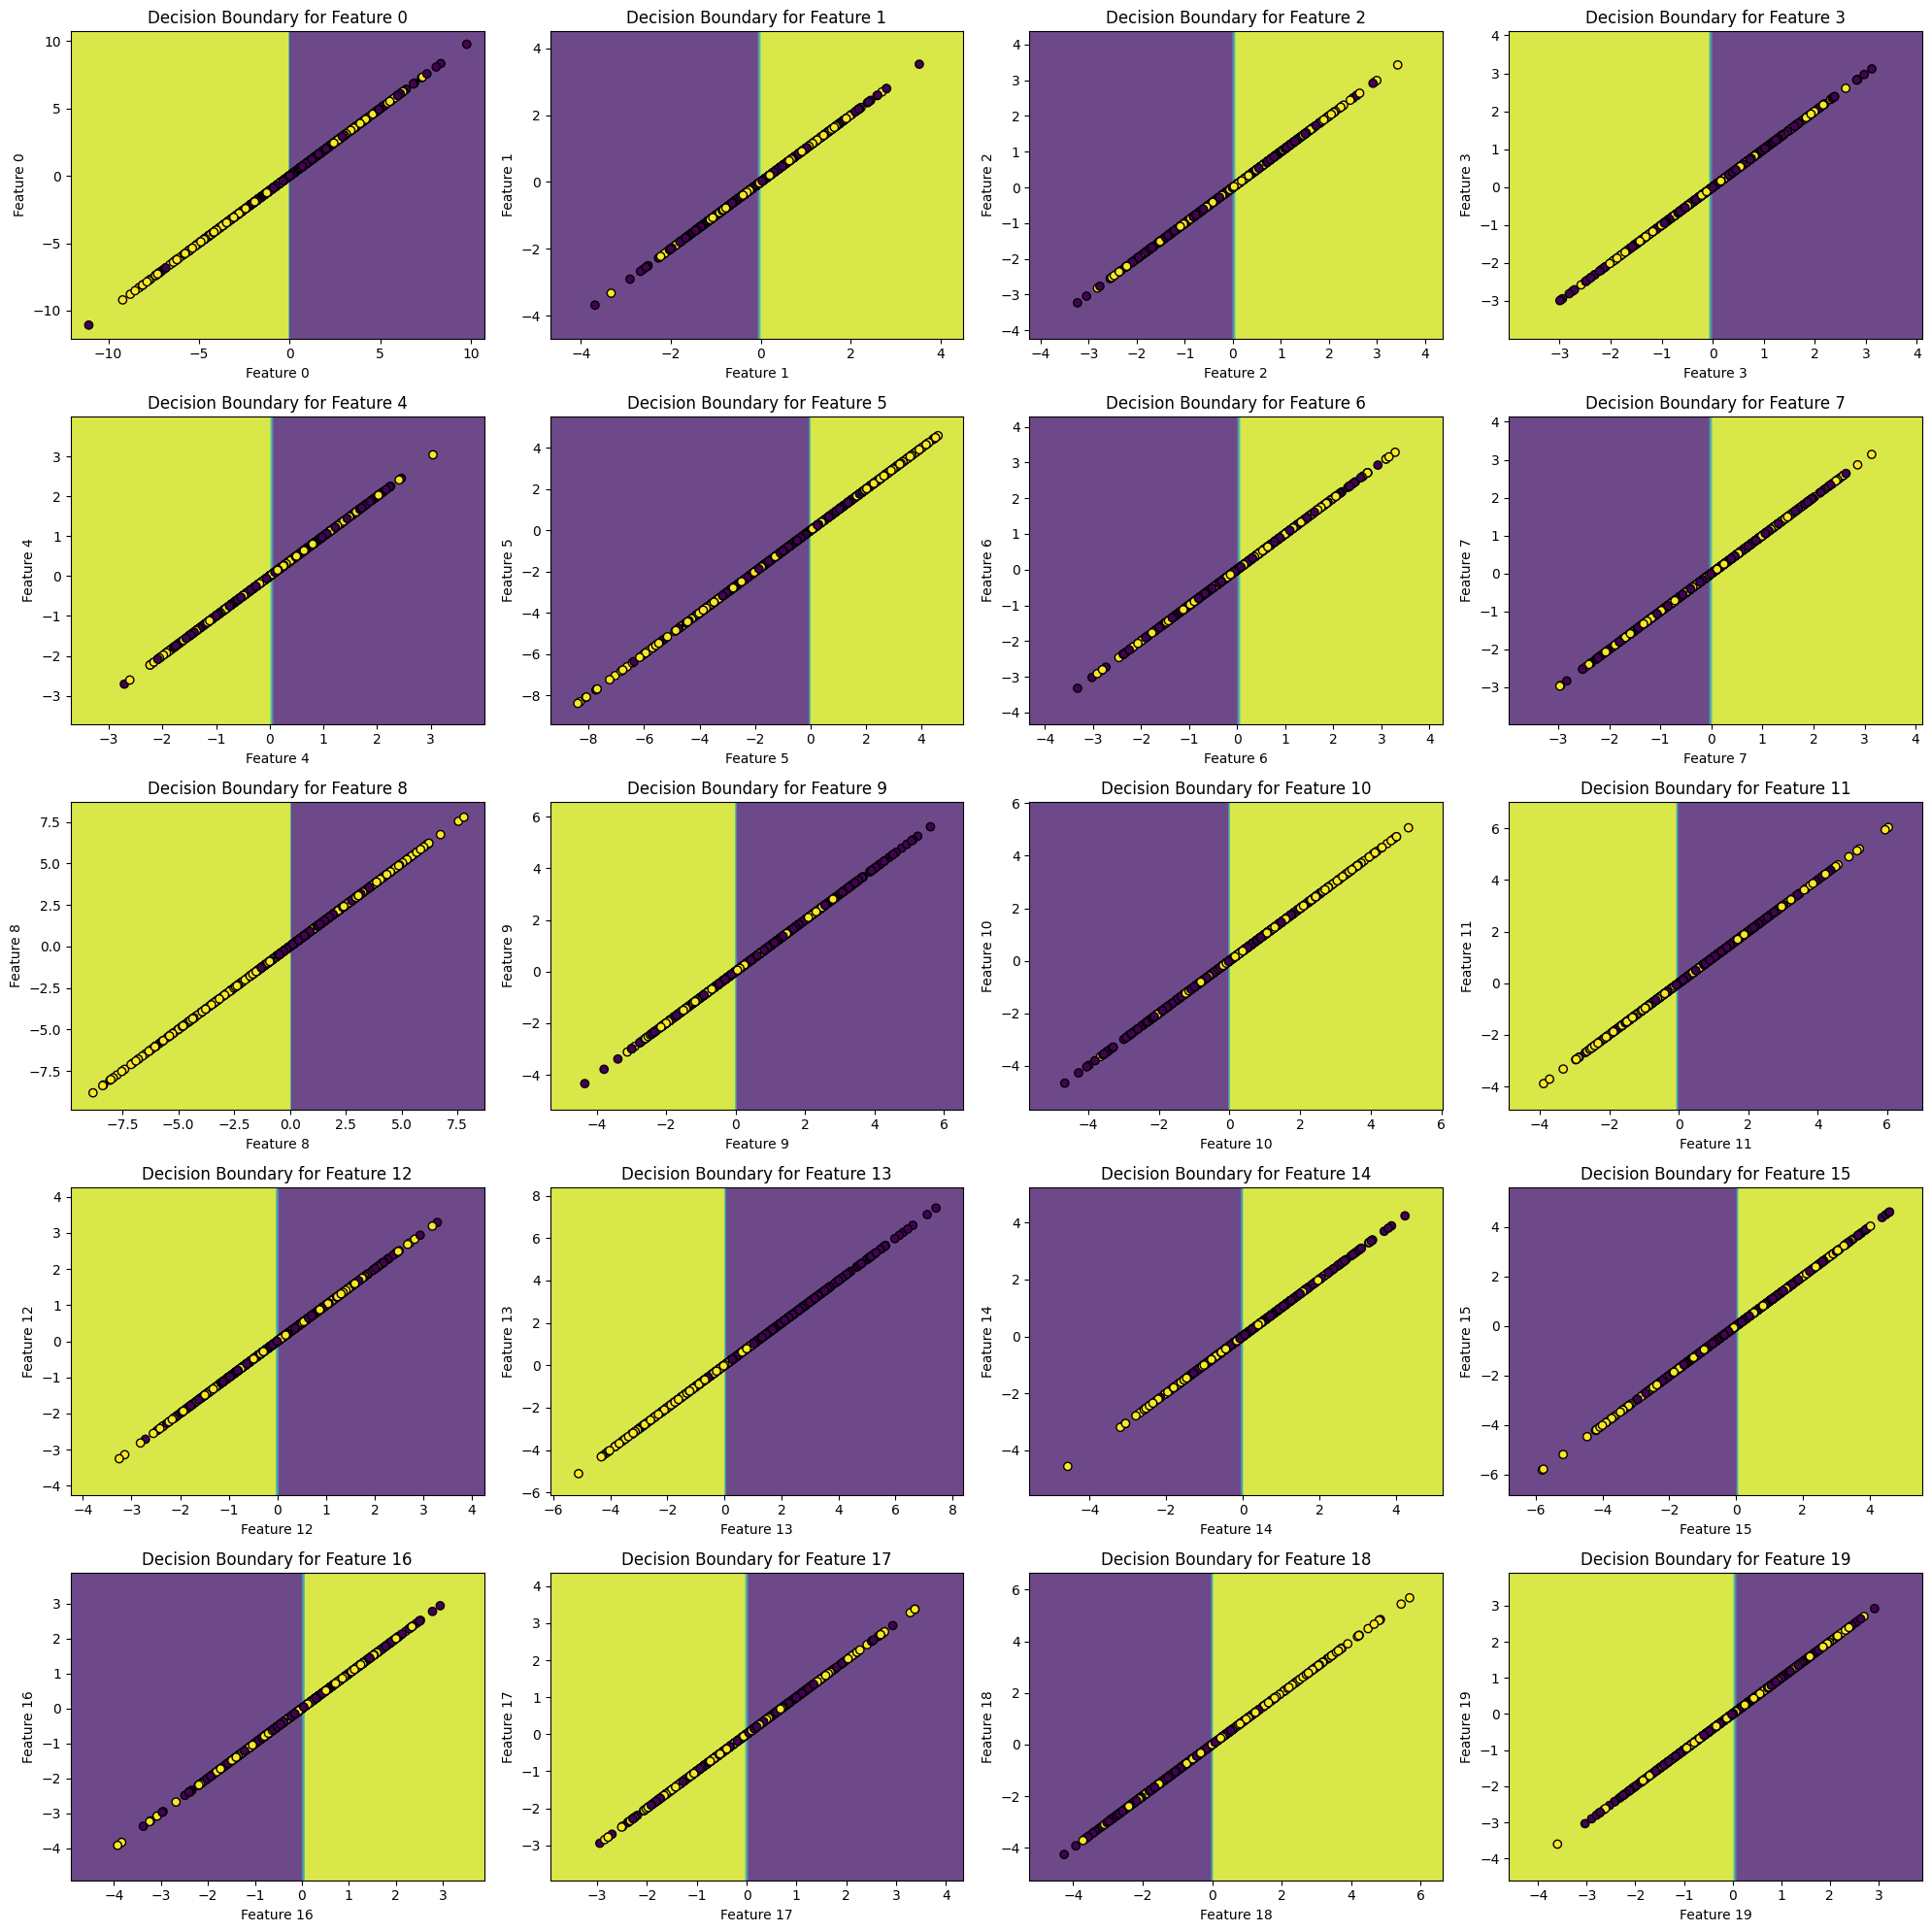

In [72]:
selected_features = np.where(beta_l1 != 0)[0]
print("Selected features by L1 regularization:", selected_features)

# Plot decision boundary for all features
def plot_decision_boundary_all_features(X, y):
  fig, axes = plt.subplots(5, 4, figsize=(20, 20))
  axes = axes.ravel()
  for i in range(X.shape[1]):
    x_min, x_max = X[:, i].min() - 1, X[:, i].max() + 1
    y_min, y_max = X[:, i].min() - 1, X[:, i].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
    X_grid = np.c_[xx.ravel(), yy.ravel()]
    X_grid_full = np.zeros((X_grid.shape[0], X.shape[1]))
    X_grid_full[:, i] = X_grid[:, 0]
    Z = (sigmoid(np.dot(X_grid_full, beta_l1)) > 0.5).astype(int)
    Z = np.array(Z).reshape(xx.shape)
    axes[i].contourf(xx, yy, Z, alpha=0.8)
    axes[i].scatter(X[:, i], X[:, i], c=y, edgecolors='k', marker='o')
    axes[i].set_xlabel(f'Feature {i}')
    axes[i].set_ylabel(f'Feature {i}')
    axes[i].set_title(f'Decision Boundary for Feature {i}')
  plt.tight_layout()
  plt.show()

plot_decision_boundary_all_features(X, y)

### Bonus Task
Multiply all by 1/0.95 or 1/0.05 and check accuracy